<a href="https://colab.research.google.com/github/KOHAKUDEUS/Healthcare-Machine-Learning/blob/main/ML_%7C_Heart_Disease_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/100+ Machine Learning Projects with Source Code [2024]/Healthcare/Data for healthcare/framingham.csv'
df = pd.read_csv(file_path)
df.head(100)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,65,3.0,0,0.0,0.0,0,0,0,193.0,123.0,76.5,29.33,60.0,96.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
98,0,56,1.0,0,0.0,0.0,0,1,0,296.0,180.0,90.0,23.72,75.0,120.0,0


In [ ]:
#kiem tra loai du lieu
categories_columns = df.select_dtypes(include = ["object", "category"]).columns
numerical_columns = df.select_dtypes(include = ['number']).columns
numerical_columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#check missing data
import pandas as pd
missing_value = df.isnull().sum()
print(missing_value)


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
#dien gia tri trung binh
df['education'].fillna(df['education'].mode()[0], inplace = True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace = True)
df['BPMeds'].fillna(df['BPMeds'].mean(), inplace = True)
df['totChol'].fillna(df['totChol'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)
df['glucose'].fillna(df['glucose'].mean(), inplace = True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace = True)
missing_value = df.isnull().sum()
missing_value

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
#checking outliner
outliner = pd.DataFrame()
for column in numerical_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  is_outliner = (df[column]<(Q1 - 1.5*IQR))|(df[column]<(Q3 + 1.5*IQR))
  outliner = is_outliner
outliner_counts = outliner.sum()
outliner


,TenYearCHD
0,False
1,False
2,False
3,False
4,False
...,...
4235,False
4236,False
4237,False
4238,False


In [ ]:
#check duplicate
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]
print(duplicate_count)

0


In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = df.iloc[:, : -1]
y = df.iloc[:, -1]

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df.sort_values('Importance', ascending = False)

,Feature,Importance
10,sysBP,0.137195
12,BMI,0.129183
1,age,0.121170
9,totChol,0.120915
14,glucose,0.119565
11,diaBP,0.115169
13,heartRate,0.096385
4,cigsPerDay,0.050729
2,education,0.036898
0,male,0.019722


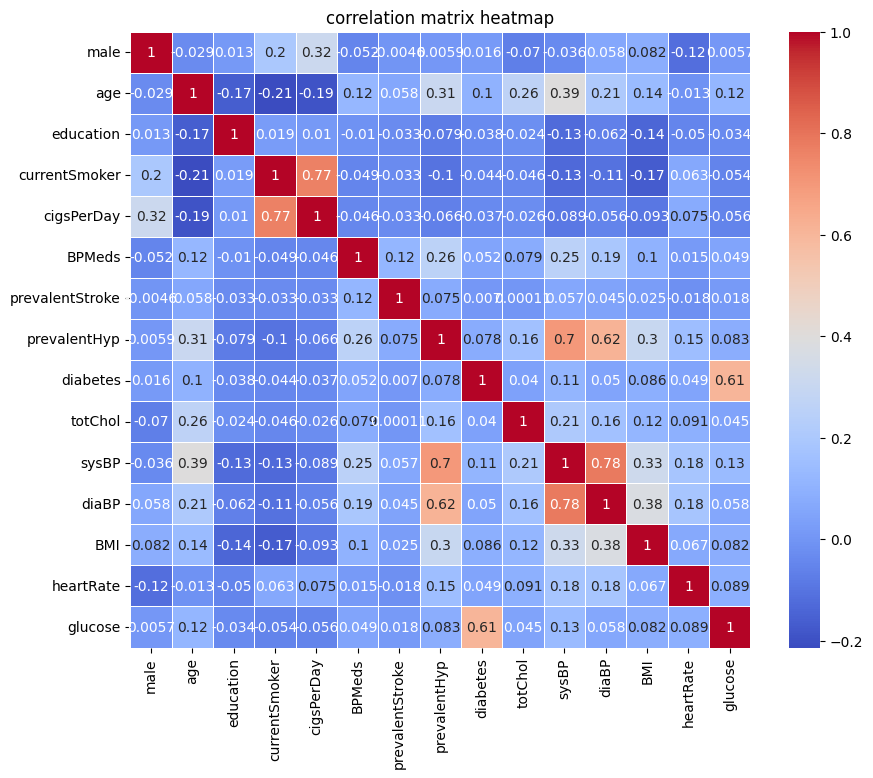

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X.corr(method = 'pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('correlation matrix heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scared = scaler.fit_transform(X)
X_scared.shape

(4240, 15)

<Axes: >

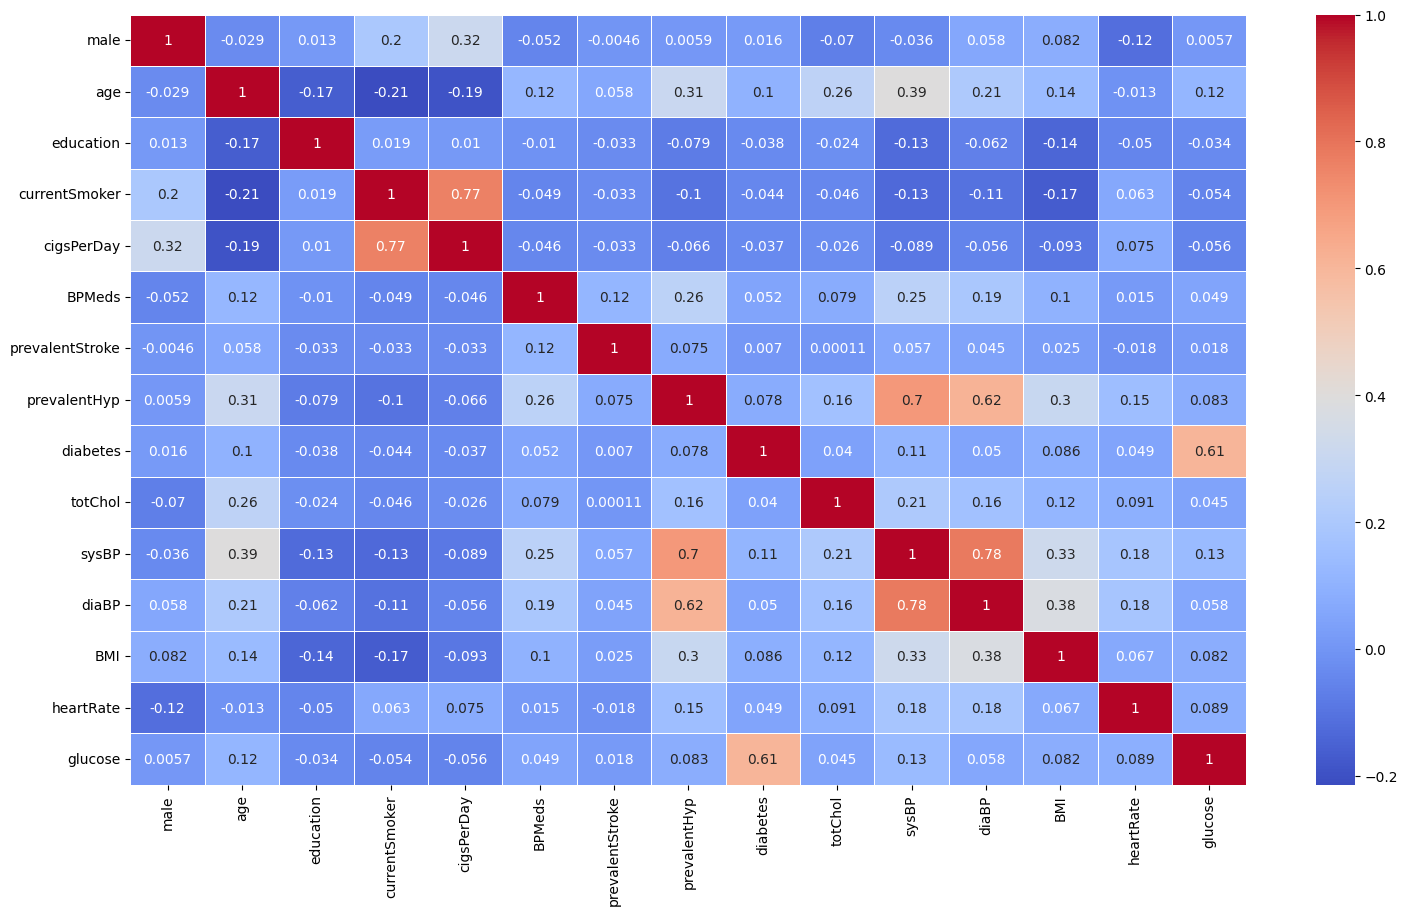

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X.corr(method = 'pearson')
plt.figure(figsize = (18,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 0.5)

In [ ]:
# Xu ly ViF

In [ ]:

import numpy as np
X_train = np.asarray(df[['sysBP','BMI', 'age', 'totChol', 'glucose','diaBP', 'heartRate', 'cigsPerDay' ]])
y = np.asarray(df['TenYearCHD'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 18)
print('Train set:', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)


Train set: (2968, 8) (2968,)
Test set:  (1272, 8) (1272,)


In [ ]:
#fitting model regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.8577044025157232


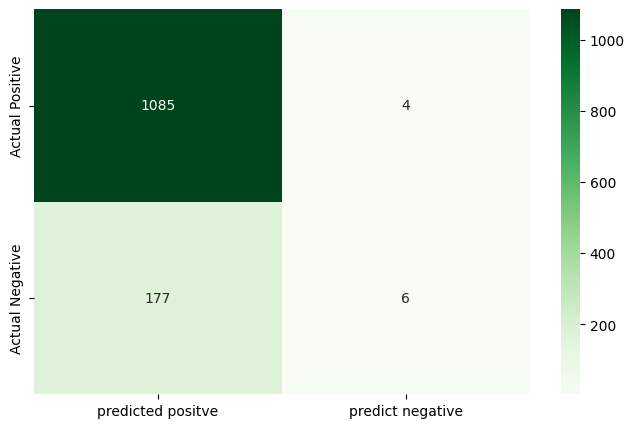

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['predicted positve', 'predict negative'], index = ['Actual Positive', 'Actual Negative'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, cmap = "Greens", fmt = 'd')
plt.show()



In [ ]:
print('the detail for confusion matrix is =')
print(classification_report(y_test, y_pred))

the detail for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1089
           1       0.60      0.03      0.06       183

    accuracy                           0.86      1272
   macro avg       0.73      0.51      0.49      1272
weighted avg       0.82      0.86      0.80      1272

